In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from time import time

In [159]:
weather_his = pd.read_csv('weatherHistory.csv', parse_dates = [0])

#print(weather_his.columns)

weather_his.columns = ['Date', 'Summary', 'Precip Type', 'Temperature',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary']

#weather_his.rename(columns = {'Formatted Date': 'Date'})
#weather_his.head()

weather_his['Date'] = pd.to_datetime(weather_his['Date'], utc=True).dt.tz_convert('Egypt')
weather_his.sort_values(by='Date', ascending = True, inplace = True)
#weather_his.index = weather_his.Date

#weather_his.Date.head(-5)
weather_his.set_index('Date', inplace = True)
#weather_his.head(-5)

weather_his.describe()
weather_his.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96453 entries, 2006-01-01 01:00:00+02:00 to 2017-01-01 00:00:00+02:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature               96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


In [114]:
'''
#s = weather_his['Date'].first_valid_index()
#e = weather_his['Date'][8000]

x = pd.to_datetime('2006-04-01 00:00:00+02:00', utc = True).tz_convert('Egypt')
print(type(x))
#r = pd.date_range(s, e)
print(weather_his.loc[x])
df1 = weather_his.loc[s:e]
df1.head(-5)
'''

"\n#s = weather_his['Date'].first_valid_index()\n#e = weather_his['Date'][8000]\n\nx = pd.to_datetime('2006-04-01 00:00:00+02:00', utc = True).tz_convert('Egypt')\nprint(type(x))\n#r = pd.date_range(s, e)\nprint(weather_his.loc[x])\ndf1 = weather_his.loc[s:e]\ndf1.head(-5)\n"

In [183]:
start_date = pd.to_datetime('2012-01-01 00:00:00+02:00', utc = True).tz_convert('Egypt')
end_date = x = pd.to_datetime('2015-01-01 04:00:00+02:00', utc = True).tz_convert('Egypt')
print(start_date)
print(end_date)
lim_weather_his = weather_his.loc[start_date:end_date]
test_data = weather_his.loc[end_date - timedelta(hours = 4): ]
test_data = pd.Series(test_data.Temperature)
lim_weather_his.head(-5)

2012-01-01 00:00:00+02:00
2015-01-01 04:00:00+02:00


,Summary,Precip Type,Temperature,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Date,,,,,,,,,,,
2012-01-01 00:00:00+02:00,Partly Cloudy,snow,-2.383333,-4.877778,0.92,6.3112,170.0,15.7297,0.0,1020.29,Partly cloudy until night.
2012-01-01 01:00:00+02:00,Partly Cloudy,snow,-2.894444,-5.388889,0.88,6.1341,180.0,6.1180,0.0,1020.48,Partly cloudy throughout the day.
2012-01-01 02:00:00+02:00,Partly Cloudy,snow,-2.755556,-4.961111,0.93,5.5384,168.0,7.7441,0.0,1020.80,Partly cloudy throughout the day.
2012-01-01 03:00:00+02:00,Partly Cloudy,snow,-3.472222,-5.983333,0.92,5.9731,178.0,7.8246,0.0,1021.27,Partly cloudy throughout the day.
2012-01-01 04:00:00+02:00,Partly Cloudy,snow,-3.544444,-3.544444,0.92,2.9624,193.0,5.9087,0.0,1021.27,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00+02:00,Clear,snow,-11.011111,-11.011111,0.79,4.7495,330.0,7.0840,0.0,0.00,Clear throughout the day.
2014-12-31 20:00:00+02:00,Partly Cloudy,snow,-11.105556,-11.105556,0.86,3.1395,321.0,7.0357,0.0,1038.43,Clear throughout the day.
2014-12-31 21:00:00+02:00,Clear,snow,-11.111111,-11.111111,0.80,1.5939,335.0,4.0250,0.0,0.00,Clear throughout the day.


DatetimeIndex(['2012-01-01 00:00:00+02:00', '2012-01-01 01:00:00+02:00',
               '2012-01-01 02:00:00+02:00', '2012-01-01 03:00:00+02:00',
               '2012-01-01 04:00:00+02:00', '2012-01-01 05:00:00+02:00',
               '2012-01-01 06:00:00+02:00', '2012-01-01 07:00:00+02:00',
               '2012-01-01 08:00:00+02:00', '2012-01-01 09:00:00+02:00',
               ...
               '2014-12-31 19:00:00+02:00', '2014-12-31 20:00:00+02:00',
               '2014-12-31 21:00:00+02:00', '2014-12-31 22:00:00+02:00',
               '2014-12-31 23:00:00+02:00', '2015-01-01 00:00:00+02:00',
               '2015-01-01 01:00:00+02:00', '2015-01-01 02:00:00+02:00',
               '2015-01-01 03:00:00+02:00', '2015-01-01 04:00:00+02:00'],
              dtype='datetime64[ns, Egypt]', name='Date', length=26306, freq=None)


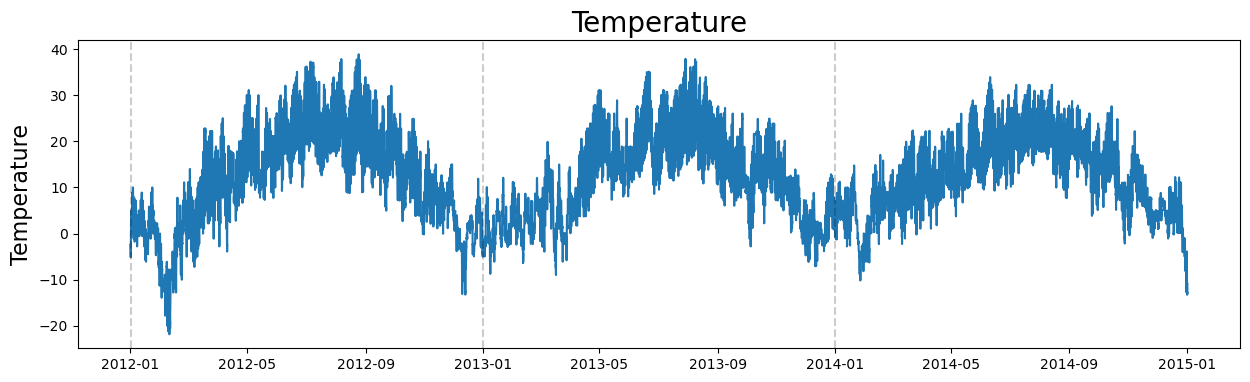

In [161]:
lim_weather_hisTemp = lim_weather_his.Temperature

print(lim_weather_hisTemp.index)

plt.figure(figsize=(15,4))
plt.plot(lim_weather_hisTemp)
plt.title('Temperature', fontsize=20)
plt.ylabel('Temperature', fontsize=16)
for year in range(start_date.year, end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

ADF Statistic: -26.053042
p-value: 0.000000


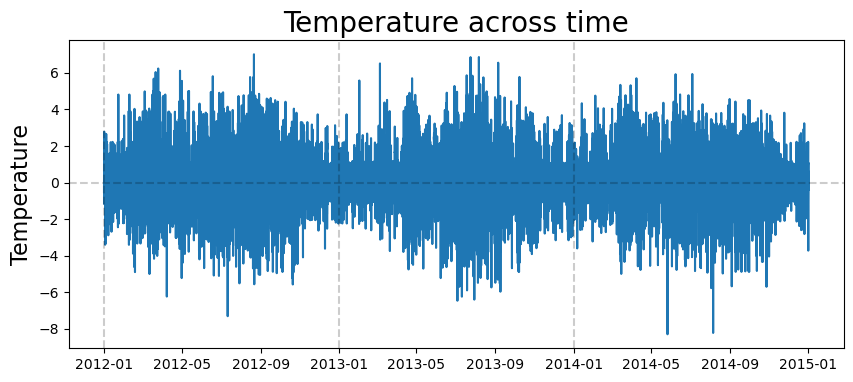

In [162]:
first_diff = lim_weather_hisTemp.diff()[1:]

plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Temperature across time', fontsize=20)
plt.ylabel('Temperature', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

#dickey fuller test
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

perform_adf_test(first_diff)

IndexError: index 3180 is out of bounds for axis 0 with size 49

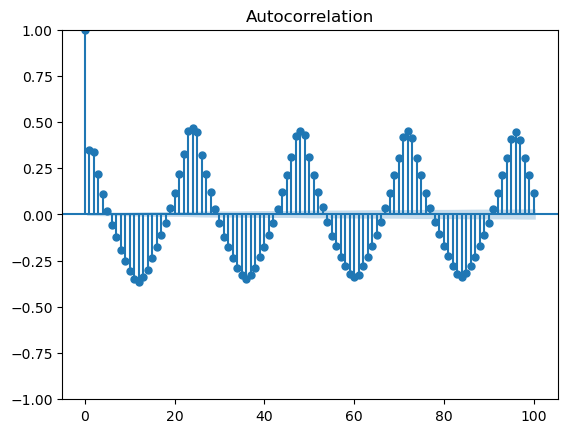

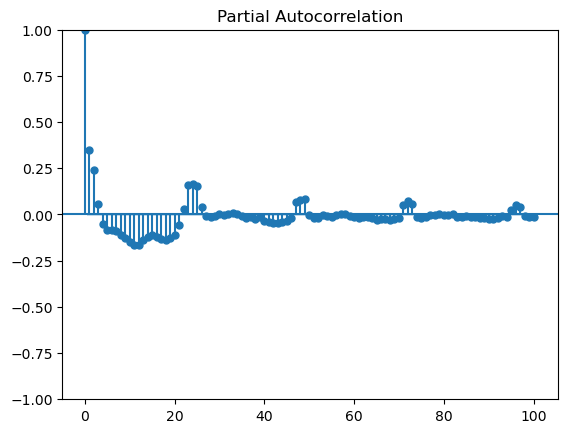

In [152]:
acf_plot = plot_acf(first_diff, lags=100)
pacf_plot = plot_pacf(first_diff, lags = 100)

acf_vals = acf(first_diff)
num_lags = 20
plt.bar(range(20), acf_vals[12*365 - 10:12*365 + 10])


pacf_vals = pacf(first_diff)
num_lags = 20
plt.bar(range(20), pacf_vals[12*365 - 10:12*365 + 10])

#so (24,1,24) works for local
#for seasonal (0,0,1) 12*365

In [165]:
#fitting sarima

train_data = lim_weather_hisTemp

my_order = (24,1,24)
my_seasonal_order = (0, 0, 0, 0)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
print('done')

done


C:\Users\gandh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gandh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [166]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

C:\Users\gandh\miniconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Fitting Time: 579.321398973465


In [167]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Temperature   No. Observations:                26306
Model:             SARIMAX(24, 1, 24)   Log Likelihood              -33709.460
Date:                Thu, 04 Jan 2024   AIC                          67516.921
Time:                        19:44:45   BIC                          67917.619
Sample:                             0   HQIC                         67646.298
                              - 26306                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1389      0.039     -3.578      0.000      -0.215      -0.063
ar.L2          0.1416      0.029      4.812      0.000       0.084       0.199
ar.L3       1.128e-05      0.026      0.000      1.0

In [168]:
print(model_fit.aic)
print(model_fit.bic)

67516.920695717
67917.61889711108


In [184]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
predictions.head()
#residuals = test_data - predictions

C:\Users\gandh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\gandh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Date
2015-01-01 00:00:00+02:00   NaN
2015-01-01 01:00:00+02:00   NaN
2015-01-01 02:00:00+02:00   NaN
2015-01-01 03:00:00+02:00   NaN
2015-01-01 04:00:00+02:00   NaN
Name: predicted_mean, dtype: float64